In [2]:
from __future__ import print_function
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images
%matplotlib inline
%load_ext autoreload
%autoreload 2



import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')


Using TensorFlow backend.


## Load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


## Load model

In [4]:
model_location = os.path.join('..', 'models', 'rotnet_mnist.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

g:\VScode\venv-rotnet\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


## Evaluate model

In [7]:
batch_size = 128
out = model.evaluate_generator(
    RotNetDataGenerator(
        X_test,
        batch_size=batch_size,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    steps=len(y_test) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

Test loss: 4.422280311584473
Test angle error: 72.88953399658203


## Display examples

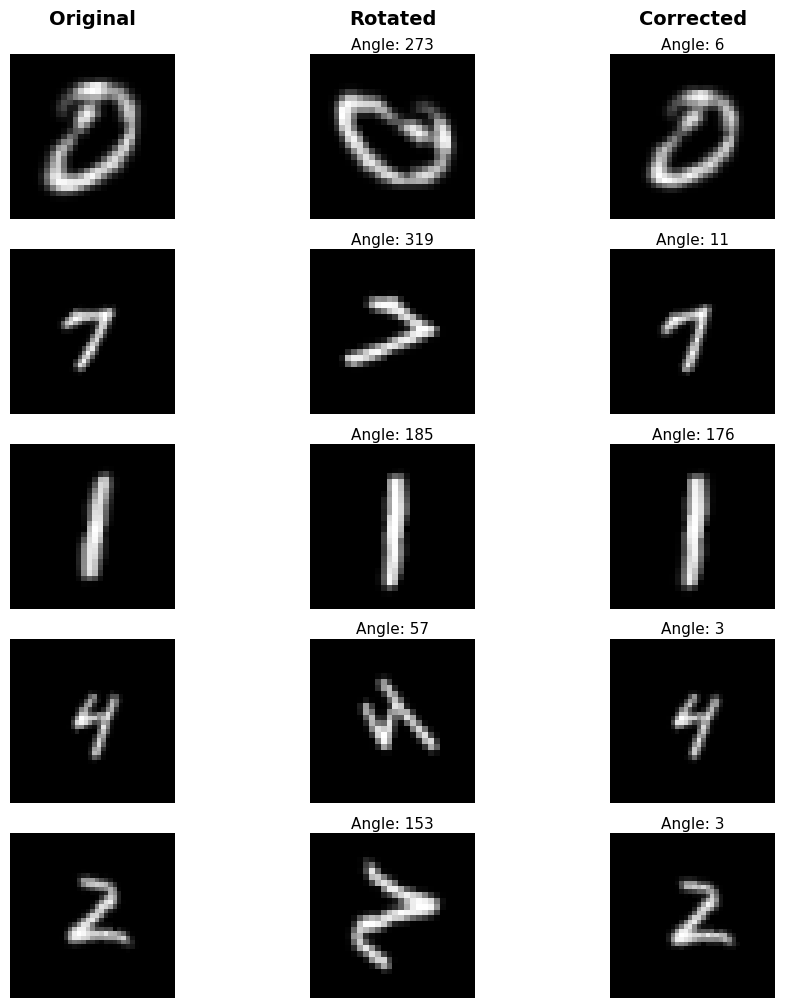

In [8]:
num_images = 5

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)